In [89]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

In [90]:
def index_psmid_table(table_file, psmid):
    table = pd.read_csv(table_file, sep='\t')
    return table[table['SpecId'].apply(lambda x: x in psmid)]

def shared_psmid(nf_psms, f_psms, threshold=0.01):
    nf = pd.read_csv(nf_psms, sep='\t')
    f = pd.read_csv(f_psms, sep='\t')
    nf_psmid = nf[nf['q-value'] <= threshold]['PSMId']
    f_psmid = f[f['q-value'] <= threshold]['PSMId']
    return set(nf_psmid).intersection(f_psmid)

In [97]:
def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1),)
    ax.set_xticklabels(labels, fontsize=15)
    ax.set_xlim(0.25, len(labels) + 0.75)
    # ax.set_xlabel('Sample name')

def plot_half_violin(data_dict : dict):
    fig, ax = plt.subplots(figsize=(4, 6), dpi=100)
    labels = list(data_dict)

    no_finetuned = [v[0] for v in data_dict.values()] 
    finetuned = [v[1] for v in data_dict.values()] 

    mins = [min(np.min(i), np.min(j)) for i, j in zip(no_finetuned, finetuned)]
    maxs = [max(np.max(i), np.max(j)) for i, j in zip(no_finetuned, finetuned)]

    plot1 = ax.violinplot(no_finetuned, showmeans=False, showextrema=False, showmedians=False)
    for b in plot1['bodies']:
        # get the center
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        # modify the paths to not go further right than the center
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        b.set_edgecolor('lightgray')
        # b.set_edgewidth(2)
    plot2 = ax.violinplot(finetuned, showmeans=False, showextrema=False, showmedians=False)
    for b in plot2['bodies']:
        # get the center
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        # modify the paths to not go further left than the center
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
        # b.set_color('b')
        b.set_edgecolor('lightgray')
        # b.set_edgewidth(2)
    for i in range(len(labels)):
        ax.text(i+1-0.2, 0.4, f"n={len(finetuned[i])}", fontsize=8, rotation=90, va='center')
    # ax.vlines([i+1 for i in range(len(labels))], mins, maxs, color='gray', linestyles='--', lw=1)
    
    x_axises = np.array([i+1 for i in range(len(labels))])
    nf_sa_mean = [np.mean(i) for i in no_finetuned]
    f_sa_mean = [np.mean(i) for i in finetuned]

    ax.hlines(nf_sa_mean, x_axises-0.2, x_axises, color='slateblue', linestyles='-', lw=1)
    ax.hlines(f_sa_mean, x_axises, x_axises+0.2, color='orange', linestyles='-', lw=1)
    ax.legend([plot1['bodies'][0],plot2['bodies'][0]],['No fine-tuned', 'Fine-tuned'], loc='lower right', frameon=False)
    set_axis_style(ax, labels)
    ax.set_ylabel("Spectral Angle", fontsize=15)
    return fig, ax

    

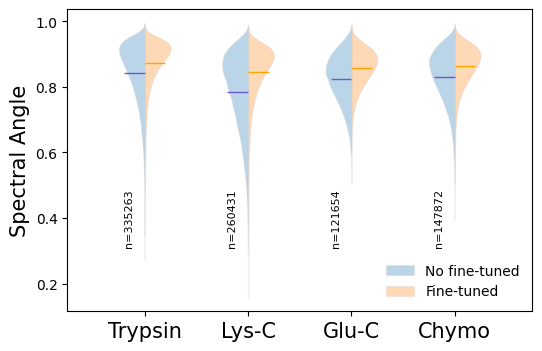

In [98]:
whichs = ['trypsin', "lysc", 'gluc', "chymo"]
data_dict = {}
frag_model = "prosit_l1"
for which, show in zip(whichs, ["Trypsin", "Lys-C", "Glu-C", "Chymo"]):
    result_dir = f"/data/prosit/figs/fig235/{which}/percolator_up/try/{frag_model}"
    no_finetuned_dir = os.path.join(result_dir, "no_finetuned_twofold")
    finetuned_dir = os.path.join(result_dir, "finetuned_twofold")
    nf_psms = os.path.join(no_finetuned_dir, "sa_target.psms")
    nf_table = os.path.join(no_finetuned_dir, "sa.tab")
    f_psms = os.path.join(finetuned_dir, "sa_target.psms")
    f_table = os.path.join(finetuned_dir, "sa.tab")
    share_psmids = shared_psmid(nf_psms, f_psms)

    nf_tab = index_psmid_table(nf_table, share_psmids)
    f_tab = index_psmid_table(f_table, share_psmids)
    nf_sa = nf_tab['spectral_angle']
    f_sa = f_tab['spectral_angle']
    data_dict[show] = (nf_sa, f_sa)
    
fig, ax = plot_half_violin(data_dict)
fig.savefig(f"fig/fig2-violin-fdr-sa-{frag_model}.svg", dpi=300)

In [101]:
whichs = ['trypsin', "lysc", 'gluc', "chymo"]
data_dict = {}
frag_model = "pdeep2"
for which, show in zip(whichs, ["Trypsin", "Lys-C", "Glu-C", "Chymo"]):
    result_dir = f"/data/prosit/figs/fig235/{which}/percolator_up/try/{frag_model}"
    no_finetuned_dir = os.path.join(result_dir, "no_finetuned_twofold")
    finetuned_dir = os.path.join(result_dir, "finetuned_twofold")
    nf_psms = os.path.join(no_finetuned_dir, "sa_target.psms")
    nf_table = os.path.join(no_finetuned_dir, "sa.tab")
    f_psms = os.path.join(finetuned_dir, "sa_target.psms")
    f_table = os.path.join(finetuned_dir, "sa.tab")
    share_psmids = shared_psmid(nf_psms, f_psms)

    nf_tab = index_psmid_table(nf_table, share_psmids)
    f_tab = index_psmid_table(f_table, share_psmids)
    nf_sa = nf_tab['spectral_angle']
    f_sa = f_tab['spectral_angle']
    data_dict[show] = (nf_sa, f_sa)
    
fig, ax = plot_half_violin(data_dict)
fig.savefig(f"fig/fig2-violin-fdr-sa-{frag_model}.svg", dpi=300)

FileNotFoundError: [Errno 2] No such file or directory: '/data/prosit/figs/fig235/trypsin/percolator_up/try/pdeep2/no_finetuned_twofold/sa.tab'